In [1]:
__author__ = "CHEN CHEN"
__studentID__ = "18M15221"
__date__ = "2018/07/14"

"""
Problem 3 source code

Including the implementation of dual of the support vector machine with l2 regularization optimized by projected gradient.
"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class LagrangeDualSVM:
    """
    :param alpha: array_like, shape(n_samples)
                  dual variables of the LagrangeDualSVM

    :param lam: float, default: 1
                Lambda as the  parameter of the regularization. larger values specify stronger regularization.

    :param lr: float, default: 0.01
               Learning rate of the gradient descent.

    :param iter: int, default: 1000
                 Iterations of the training.
    """
    def __init__(self, alpha=None, lam=1, lr=0.01, iter=1000):
        self.alpha = alpha
        self.lam = lam
        self.lr = lr
        self.iter = iter
        self.score = []
        self.loss_and_reg = []
        self.K = None

    def lagrange_function(self, K, alpha):
        """
        Implementation of Lagrange Dual SVM.

        :param K: array_like, shape(n_samples, n_samples)
                  Symmertic square matrix of the given samples.

        :param alpha: array_like, shape(n_samples)
                      dual variables of the LagrangeDualSVM

        :return: float,
                 Objective function value.

        """
        return alpha.T.dot(K).dot(alpha) / (-4*self.lam) + sum(alpha)

    @staticmethod
    def hinge_loss(X, y, w):
        """
        Hinge loss of the given samples and current weight w.

        :param X: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param w: array_like, shape(n_features)
                   Weight array.
        :return: float,
                 Sum of the hinge loss.
        """
        return np.sum(list(map(lambda x: 0 if x < 0 else x, 1 - X.dot(w)*y)))

    def loss_and_regularization(self, X, y, alpha):
        """
        Calculate the sum of hinge loss and regularization.

        :param X: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :param alpha: array_like, shape(n_samples)
                      Dual variables of the LagrangeDualSVM

        :return: float,
                 Sum of the hinge loss and regularization.
        """
        w = np.sum(X.T*(alpha*y), axis=1) / (2*self.lam)
        return self.hinge_loss(X, y, w) + self.lam*w.dot(w)

    def _gradient(self, alpha):
        """
        Gradient of the current dual variables alpha.

        :param alpha: array_like, shape(n_samples)
                      Dual variables of the LagrangeDualSVM

        :return: array_like, shape(n_samples)
                 Gradient array.

        """
        return self.K.dot(alpha) / (2*self.lam) - np.ones(len(alpha))

    @staticmethod
    def projected_gradient(alpha):
        """
        Implementation of the projected gradient method.

        :param alpha: array_like, shape(n_samples)
                      Dual variables of the LagrangeDualSVM

        :return: array_like, shape(n_samples)
                 Projected gradient array.
        """
        return np.array(list(map(lambda x: 1 if x > 1 else(0 if x < 0 else x), alpha)))

    def fit(self, X, y):
        """
        Main routine of the model by fitting the given training data using projected gradient.

        :param X: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return: None
        """
        n, _ = X.shape
        self.alpha = np.zeros(n)
        self.K = (X.T*y).T.dot(X.T*y)
        for _ in range(self.iter):
            self.score.append(self.lagrange_function(self.K, self.alpha))
            self.loss_and_reg.append(self.loss_and_regularization(X, y, self.alpha))
            self.alpha = self.alpha - self.lr*self._gradient(self.alpha)
            self.alpha = self.projected_gradient(self.alpha)

    def visualize(self):
        """
        Visualize the score and sum of hinge loss and the regularization w.r.t the iteration.

        :return: None
        """
        assert self.score and self.loss_and_reg, "Call fit() to train the model firstly"
        plt.figure(figsize=(8, 8))
        plt.plot(np.arange(self.iter), self.score, c="b", label="score of dual largange function")
        plt.plot(np.arange(self.iter), self.loss_and_reg, c="r", label="sum of hinge loss and the regularization")
        plt.xlabel("iteration")
        plt.title("Result")
        plt.legend()
        plt.show()

    def plot_hyperplane(self, X, y):
        """
        Plot the hyperplane defined by the dual SVM.

        :param X: array_like, shape(n_samples, n_features)
                   Training array, where n_samples is the number of samples and n_features is the number of features.

        :param y: array_like, shape(n_samples)
                   Target array relative to X.

        :return: None
        """
        assert self.alpha is not None, "Call fit() to train the model firstly"
        plt.figure(figsize=(8, 8))
        plt.scatter(X[:, 0], X[:, 1], c=y)
        w = np.sum(X.T*(self.alpha * y), axis=1) / (2 * self.lam)
        x = np.linspace(np.min(X[:, 0]), np.max(X[:, 1]), 100)
        plane = -w[0] * x / w[1]
        plt.plot(x, plane, c="b")
        plt.show()

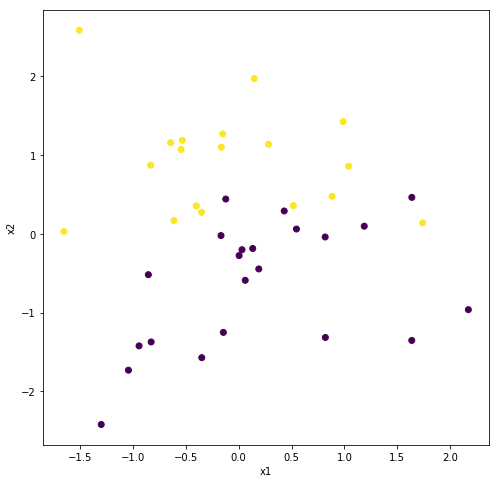

In [3]:
# set seed
np.random.seed(15221)

# generate dataset 2
n = 40
omega = np.random.randn(1)
noise = 0.8 * np.random.randn(n, 1)
x = np.random.randn(n, 2)
y = omega*x[:, 0].reshape(-1, 1) + x[:, 1].reshape(-1, 1) + noise
y = (2*np.heaviside(y, 0) - 1)[:, 0]

# plot the dataset 2
plt.figure(figsize=(8, 8))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlabel("x1")
plt.ylabel("x2")
# plt.savefig("Dataset2.pdf")
plt.show()

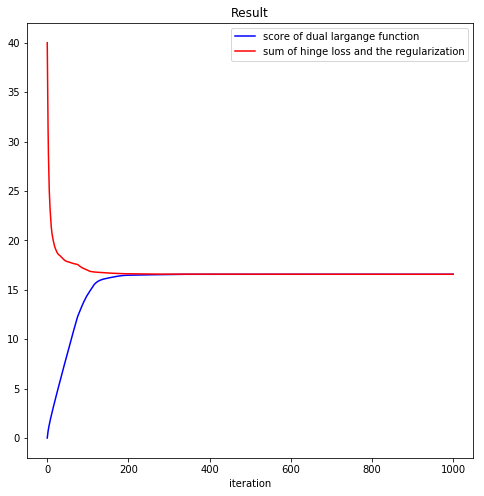

In [4]:
# train LagrangeDualSVM model
clf = LagrangeDualSVM()
clf.fit(x, y)
clf.visualize()

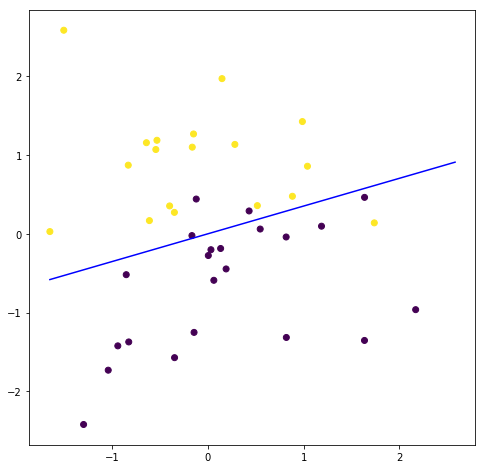

In [5]:
# plot the hyperplane after training
clf.plot_hyperplane(x, y)